<a href="https://colab.research.google.com/github/harshaelon/Machine-learning/blob/main/Support_Vector_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# dataset : https://www.kaggle.com/datasets/merishnasuwal/breast-cancer-prediction-dataset?resource=download

#  blog link : https://towardsdatascience.com/case-study-breast-cancer-classification-svm-2b67d668bbb7

In [ ]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

#Import models from scikit learn

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.svm import SVC

#Loading the data

In [ ]:
df_cancer = pd.read_csv('/content/Breast_cancer_data.csv')

In [ ]:
df_cancer.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


#Visualizing Data

<Figure size 700x700 with 0 Axes>

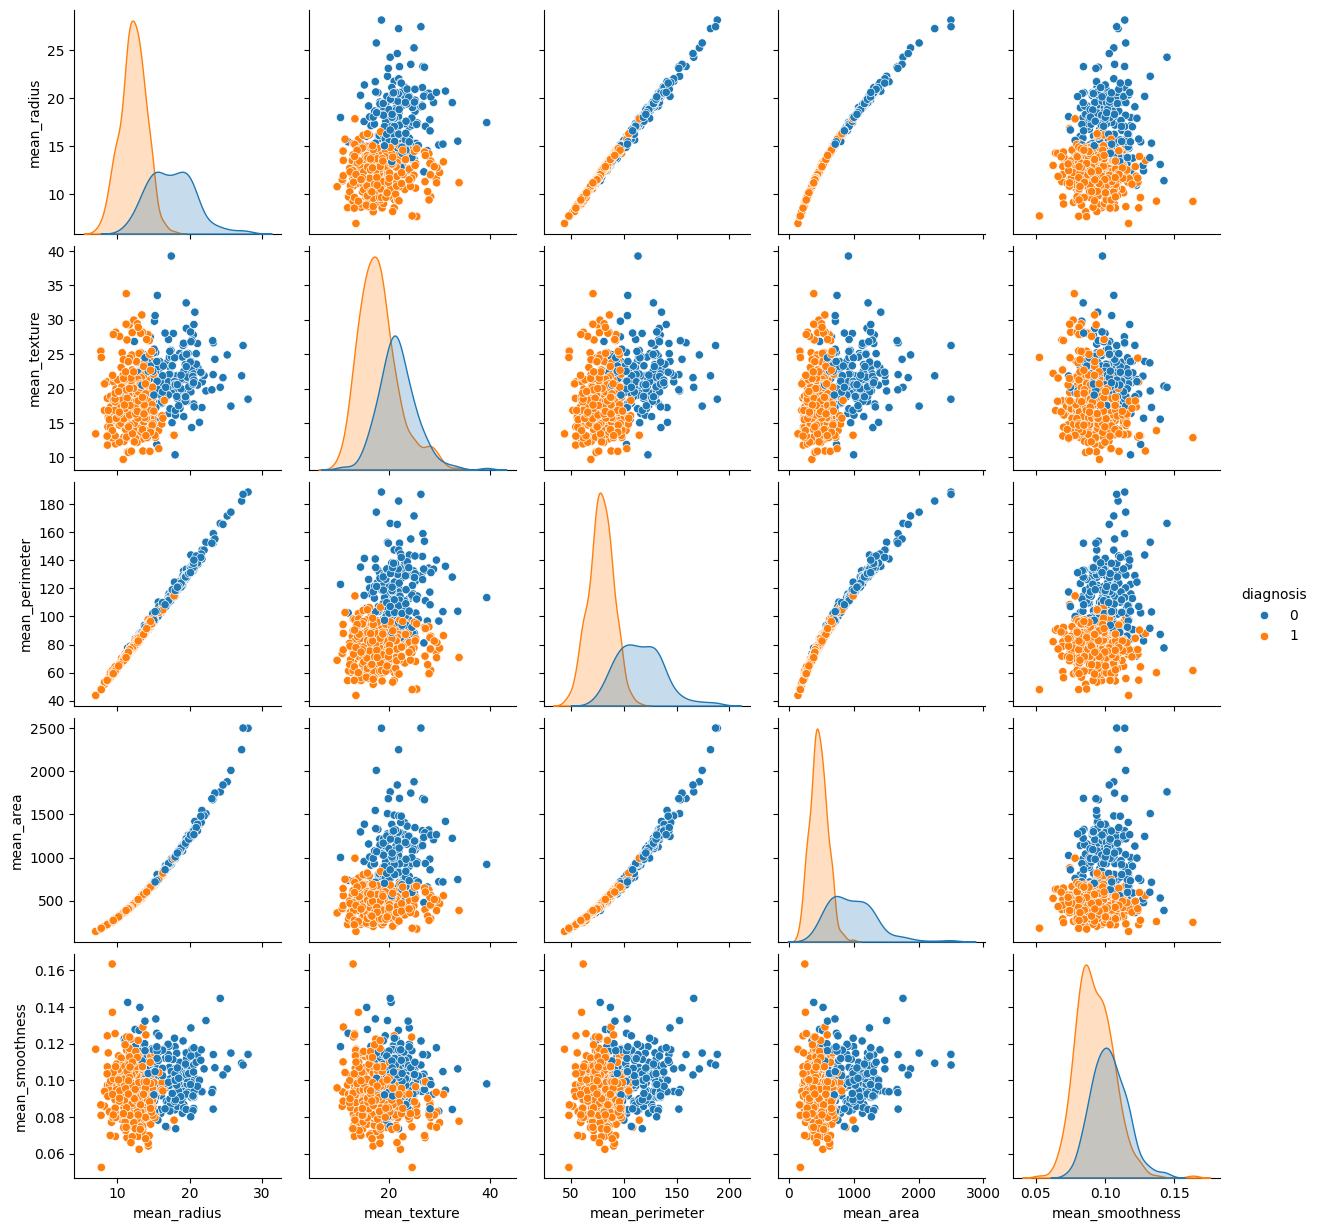

<Figure size 700x700 with 0 Axes>

In [ ]:
sns.pairplot(df_cancer , hue = 'diagnosis')

plt.figure(figsize=(7,7))



<Axes: xlabel='mean_texture', ylabel='mean_perimeter'>

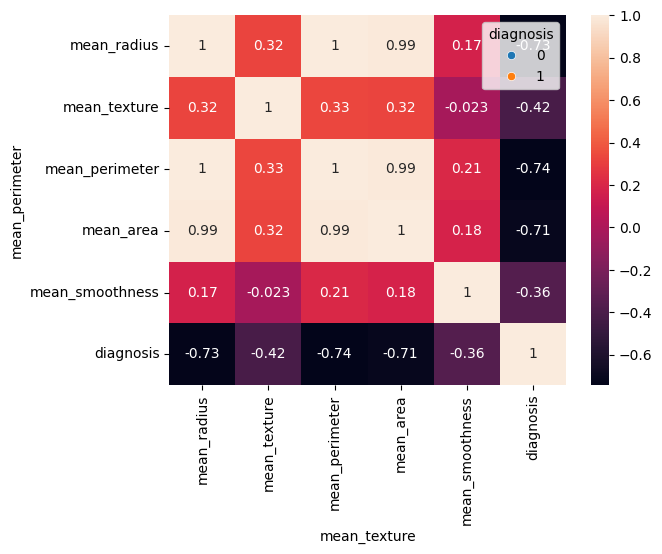

In [ ]:
sns.heatmap(df_cancer['mean_radius mean_texture mean_perimeter mean_area mean_smoothness diagnosis'.split()].corr(),annot  = True)

sns.scatterplot(x='mean_texture' , y = 'mean_perimeter' , hue = 'diagnosis',data =df_cancer)

#visualizing features correlation

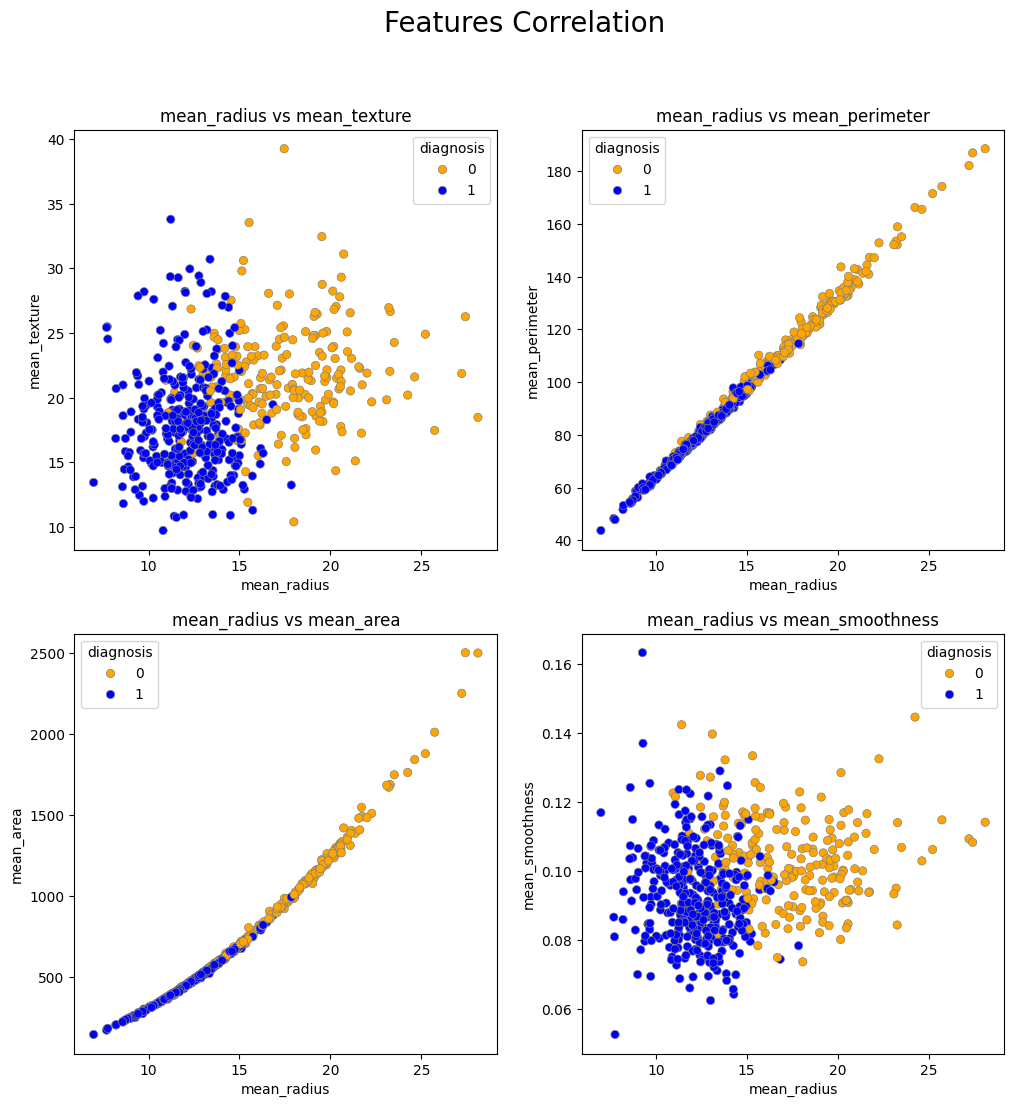

In [ ]:
palette = {0:'orange',1:'blue'}
edgecolor = 'grey'


fig = plt.figure(figsize=(12,12))
plt.subplot(221)

ax1 = sns.scatterplot(x = df_cancer['mean_radius'], y = df_cancer['mean_texture'], hue = "diagnosis",
data = df_cancer, palette =palette, edgecolor=edgecolor)
plt.title('mean_radius vs mean_texture')
plt.subplot(222)
ax2 = sns.scatterplot(x = df_cancer['mean_radius'], y = df_cancer['mean_perimeter'], hue = "diagnosis",
data = df_cancer, palette =palette, edgecolor=edgecolor)
plt.title('mean_radius vs mean_perimeter')
plt.subplot(223)
ax3 = sns.scatterplot(x = df_cancer['mean_radius'], y = df_cancer['mean_area'], hue = "diagnosis",
data = df_cancer, palette =palette, edgecolor=edgecolor)
plt.title('mean_radius vs mean_area')
plt.subplot(224)
ax4 = sns.scatterplot(x = df_cancer['mean_radius'], y = df_cancer['mean_smoothness'], hue = "diagnosis",
data = df_cancer, palette =palette, edgecolor=edgecolor)
plt.title('mean_radius vs mean_smoothness')
fig.suptitle('Features Correlation', fontsize = 20)
plt.savefig('2')
plt.show()

# Handling of Missing/Categorical data

In [ ]:
df_cancer.isnull().sum()

,0
mean_radius,0
mean_texture,0
mean_perimeter,0
mean_area,0
mean_smoothness,0
diagnosis,0


In [ ]:
df_cancer.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
df_cancer.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


Text(0.5, 1.0, 'Corr. between features and target')

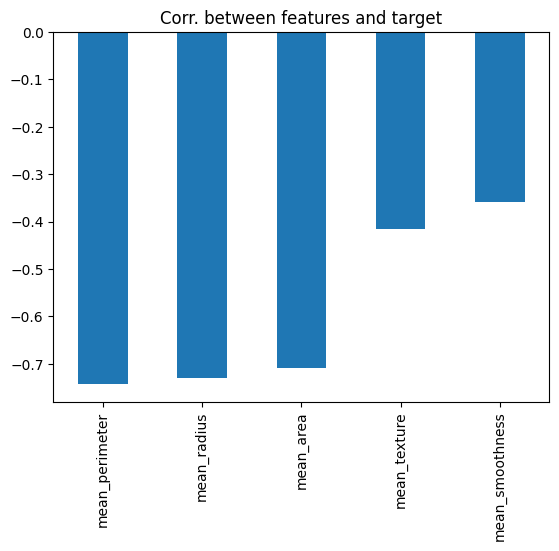

In [ ]:

# correlation between features
df_cancer.corr()['diagnosis'][:-1].sort_values().plot(kind ='bar')
plt.title('Corr. between features and target')

Text(0.5, 1.0, 'number of Benign_0 vs Malignan_1')

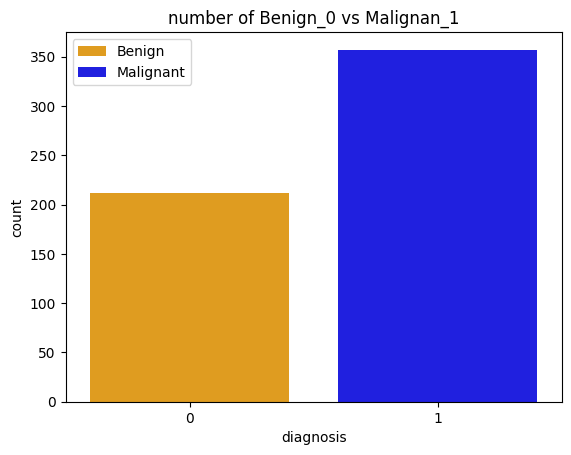

In [ ]:
sns.countplot(x='diagnosis',data = df_cancer,palette=palette , hue = 'diagnosis')
plt.legend(['Benign','Malignant'])
plt.title('number of Benign_0 vs Malignan_1')

#Splitting the data

In [ ]:
X = df_cancer.drop(['diagnosis'],axis=1).values

y = df_cancer['diagnosis'].values

In [ ]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, 8.581e+02, 8.455e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, 1.265e+03, 1.178e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, 1.810e+02, 5.263e-02]])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

#Training the model

In [ ]:
svc_model = SVC()

svc_model.fit(X_train,y_train)

SVC()

#Model Evaluation

In [ ]:
from sklearn.metrics import classification_report ,confusion_matrix

In [ ]:
y_predict = svc_model.predict(X_test)

<Axes: >

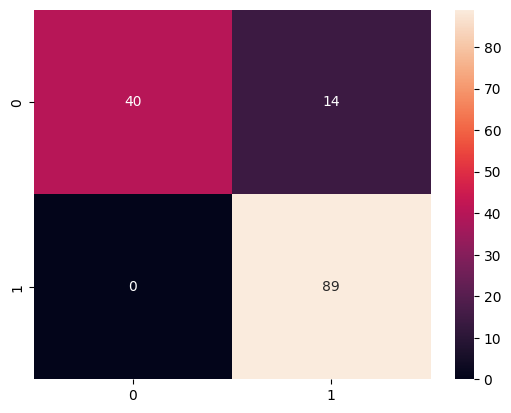

In [ ]:
conf_matrix = confusion_matrix(y_test,y_predict)

sns.heatmap(conf_matrix,annot=True,fmt='d')

In [ ]:
# writing code for classification matrix

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85        54
           1       0.86      1.00      0.93        89

    accuracy                           0.90       143
   macro avg       0.93      0.87      0.89       143
weighted avg       0.92      0.90      0.90       143



#So how can we imporve our model?

1. Data normalization
2. SVM parameters optimization

In [ ]:
# lets check on feature scaling, which will bring all our values from [0,1]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
n_scaler = MinMaxScaler()

X_train_scaled = n_scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = n_scaler.transform(X_test.astype(np.float64))



In [ ]:
svc_model.fit(X_train_scaled,y_train)

SVC()

In [ ]:
y_predict_scaled = svc_model.predict(X_test_scaled)

In [ ]:
confuse1 = confusion_matrix(y_test, y_predict_scaled)

<Axes: >

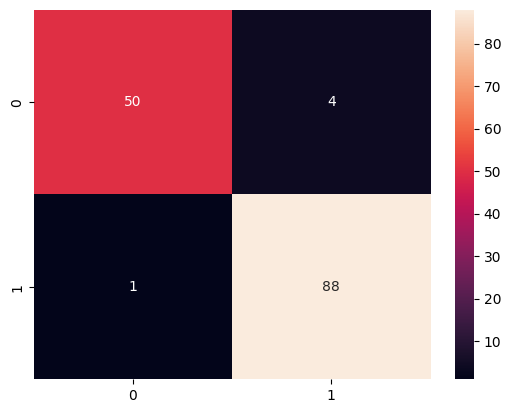

In [ ]:
sns.heatmap(confuse1,annot = True)

In [ ]:
print(classification_report(y_test,y_predict_scaled))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        54
           1       0.96      0.99      0.97        89

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



# model parameters optimization

In [ ]:
# c value and gamma value


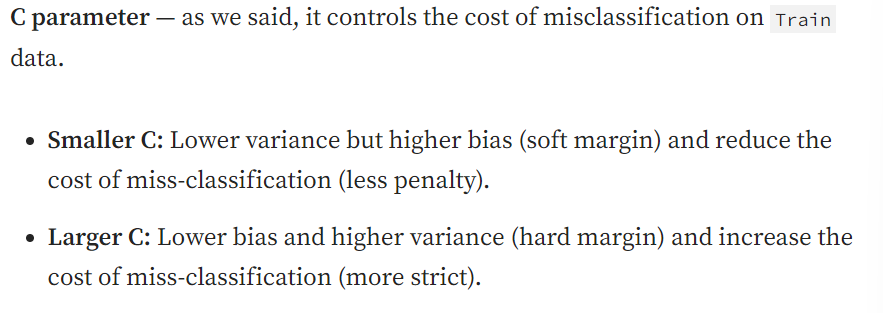

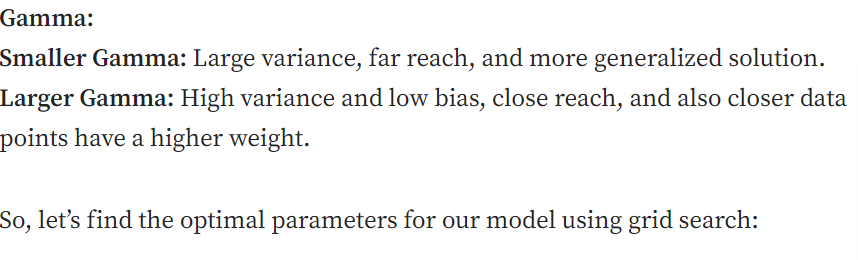

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C':[0.1,1,10,0.01,100], 'gamma': [1,0.1,0.01,0.001,0.11] , 'kernel':['rbf']}

In [ ]:
grid = GridSearchCV(SVC(),param_grid,verbose=4)

grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.837 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.847 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.976 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.847 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.871 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.640 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.647 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.635 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.624 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.647 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.628 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 0.01, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.11],
                         'kernel': ['rbf']},
             verbose=4)

In [ ]:
grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
grid.best_estimator_

SVC(C=100, gamma=0.1)

In [ ]:
grid_predict = grid.predict(X_test_scaled)

<Axes: >

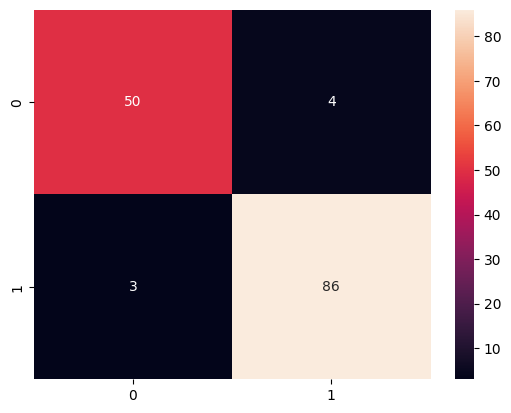

In [ ]:
confuse2 = confusion_matrix(y_test,grid_predict)

sns.heatmap(confuse2,annot=True)

In [ ]:
print(classification_report(y_test,grid_predict))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93        54
           1       0.96      0.97      0.96        89

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

